# Linear Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
insurance=pd.read_csv("new_insurance_data.csv")

In [3]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [5]:
# EDA -Exploratory Data Analysis

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [7]:
# Null Values
insurance.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [8]:
insurance.shape

(1338, 13)

In [9]:
replace
object --> mode
mumerical-> mean/median


SyntaxError: invalid syntax (2619394404.py, line 2)

In [10]:
col_names=insurance.columns

In [11]:
col_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [12]:
insurance["sex"].mode()[0]

'male'

In [13]:
insurance["bmi"].mean()

30.665112359550537

In [14]:
insurance["age"]=insurance["age"].fillna(insurance["age"].mode()[0])

In [15]:
insurance[i]=insurance[i].fillna(insurance[i].mode()[0])

NameError: name 'i' is not defined

In [16]:
for i in col_names:
    if insurance[i].dtype=="object":
        insurance[i]=insurance[i].fillna(insurance[i].mode()[0])
    else:
        insurance[i]=insurance[i].fillna(insurance[i].mean())  

In [17]:
insurance.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [18]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [19]:
insurance.duplicated().sum()

0

In [20]:
# insuarance.drop_duplicates() we dont have any duplicates so we dont need to perform this code

In [21]:
#presence of outliers
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1a00f776400>,
 'caps': [<matplotlib.lines.Line2D at 0x1a00f7769a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a00f776130>],
 'medians': [<matplotlib.lines.Line2D at 0x1a00f776f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a00f786250>],
 'means': []}

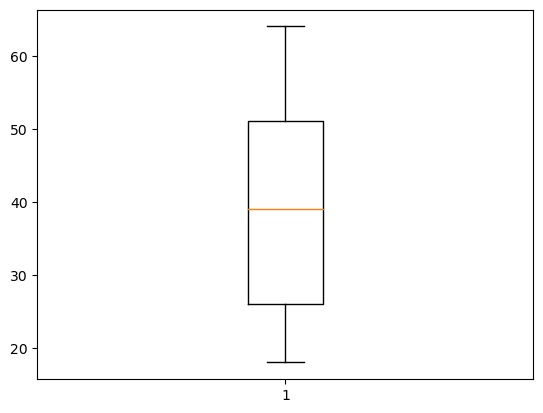

In [22]:
plt.boxplot(insurance["age"])

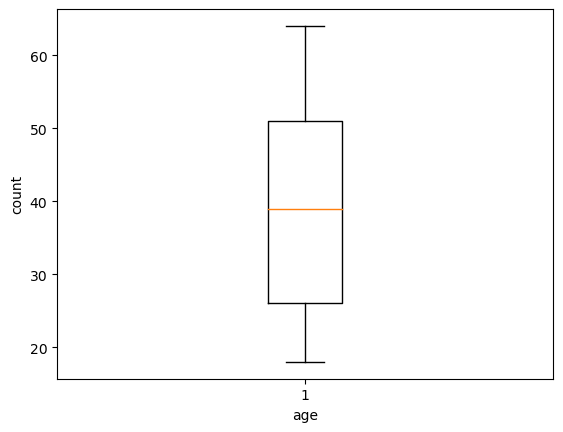

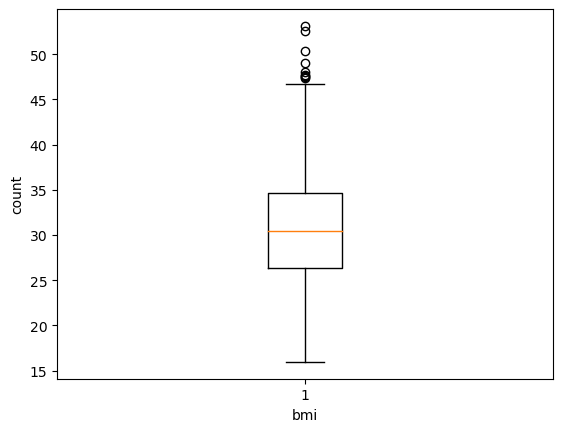

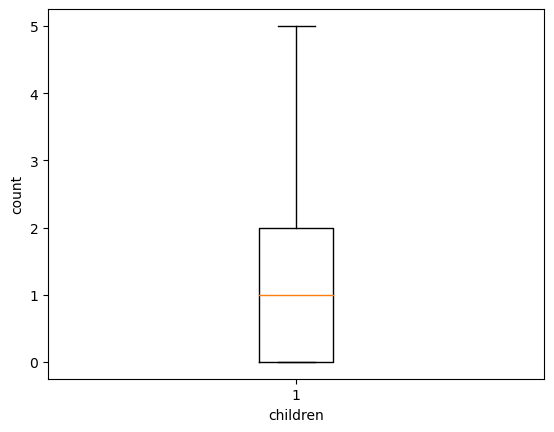

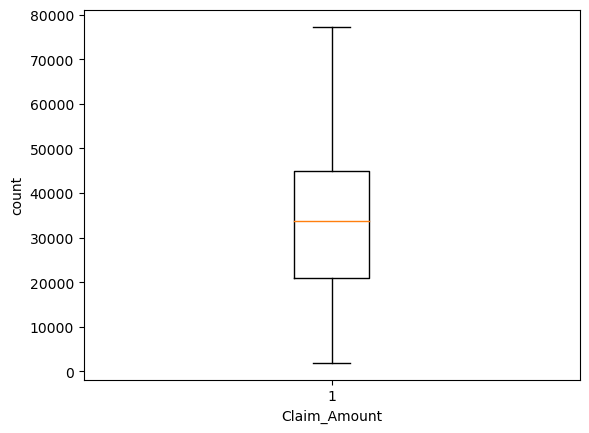

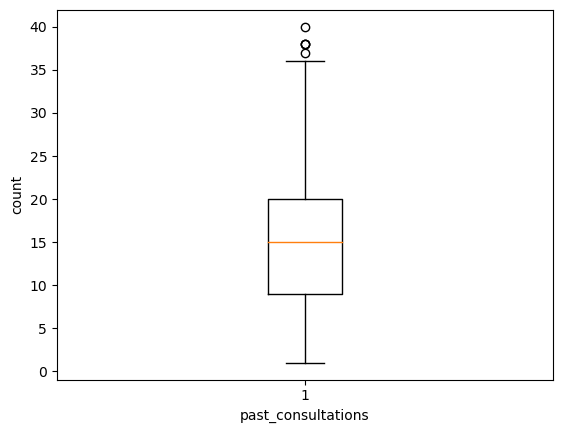

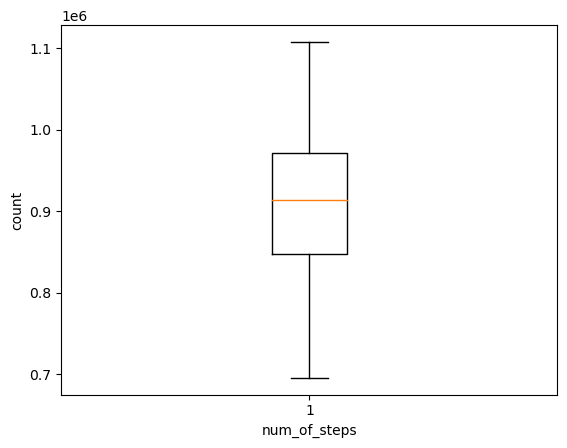

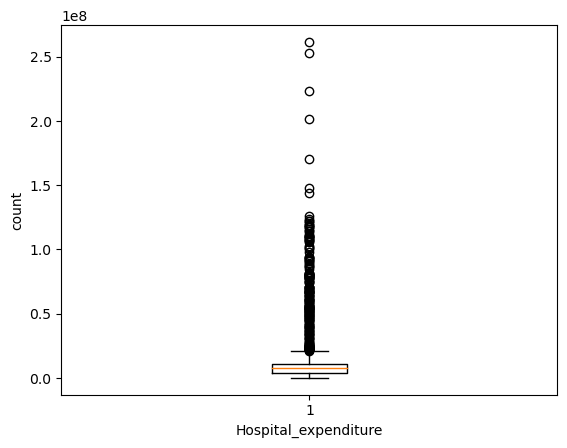

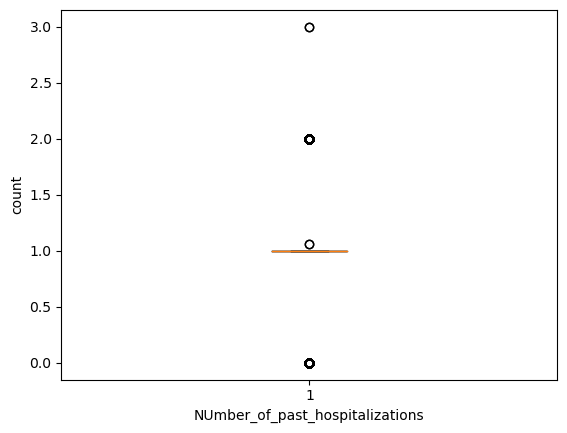

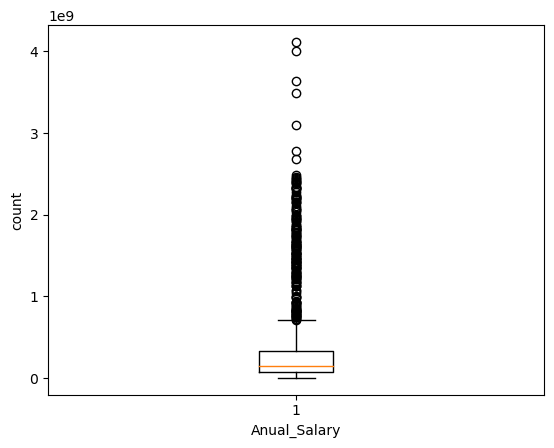

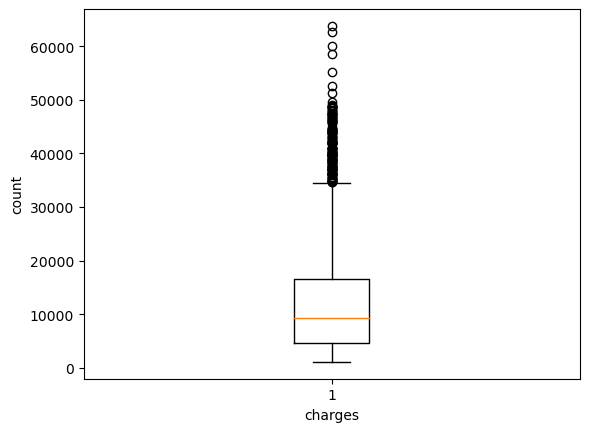

In [23]:
#outliers - 
for col in col_names:
    if insurance[col].dtype!="object":
        plt.boxplot(insurance[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [24]:
col_list=["past_consultations","Hospital_expenditure","NUmber_of_past_hospitalizations","Anual_Salary","charges"]

In [25]:
IQR--> Inter Quartile Range
Q1- 25%
Q2- 50%
Q3- 75%

SyntaxError: invalid syntax (781562940.py, line 1)

In [26]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [27]:
Q1=insurance["bmi"].quantile(0.25)
Q2=insurance["bmi"].quantile(0.50)
Q3=insurance["bmi"].quantile(0.75)

In [28]:
Q1,Q2,Q3

(26.315, 30.4, 34.65625)

In [29]:
IQR=Q3-Q1

In [30]:
IQR

8.341249999999999

In [31]:
lower_range =Q1-1.5*IQR
upper_range =Q3+1.5*IQR

In [32]:
lower_range,upper_range

(13.803125000000003, 47.168124999999996)

In [33]:
insurance = insurance[(insurance['bmi']>=lower_range) & (insurance['bmi']<=upper_range)]

In [34]:
for i in col_list:
    Q1=insurance[i].quantile(0.25)
    Q2=insurance[i].quantile(0.50)
    Q3=insurance[i].quantile(0.75)
    IQR=Q3-Q1
    lower_range =Q1-1.5*IQR
    upper_range =Q3+1.5*IQR
    insurance = insurance[(insurance[i]>=lower_range) & (insurance[i]<=upper_range)]

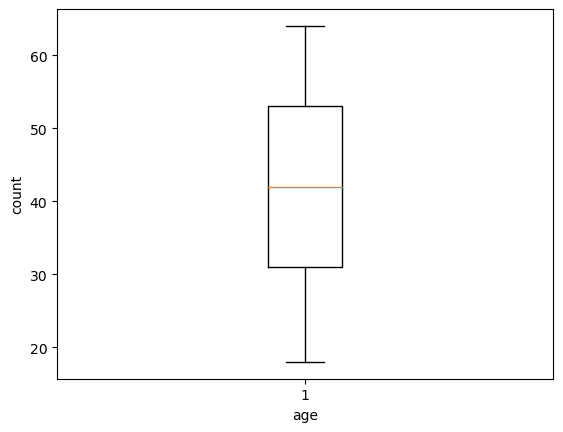

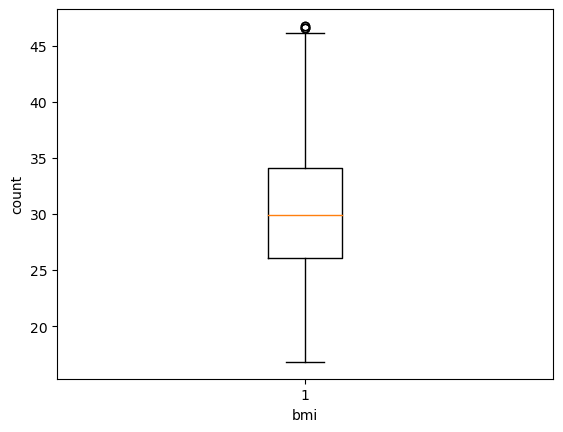

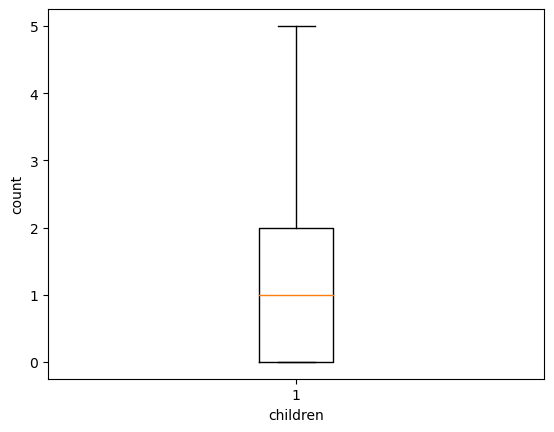

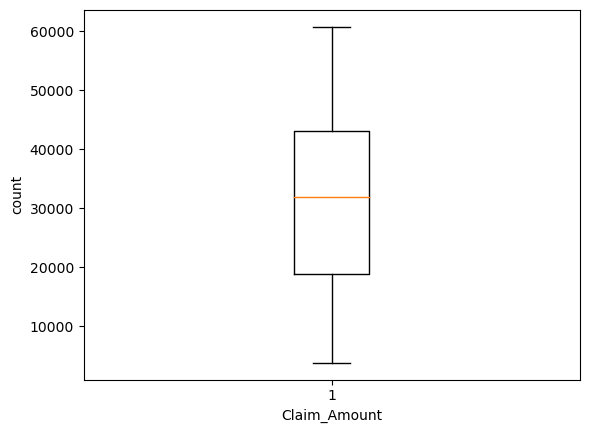

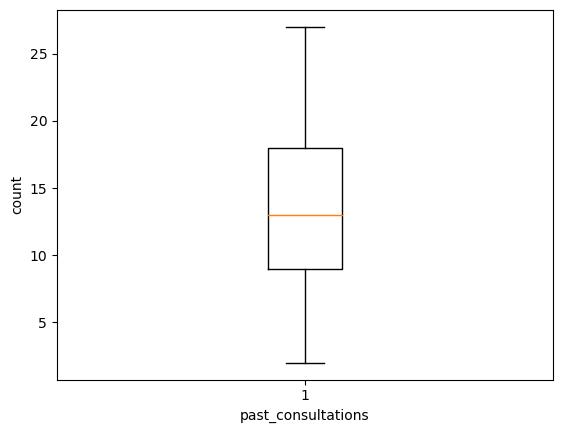

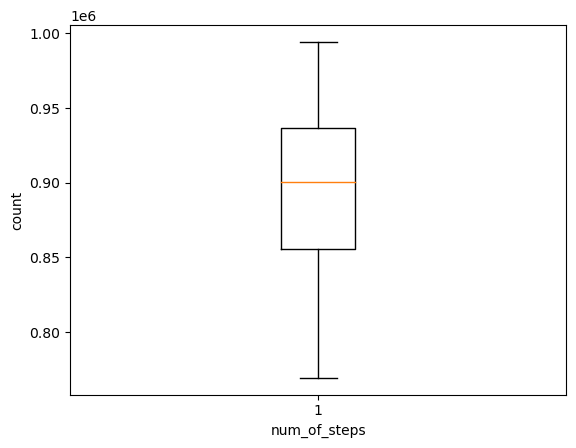

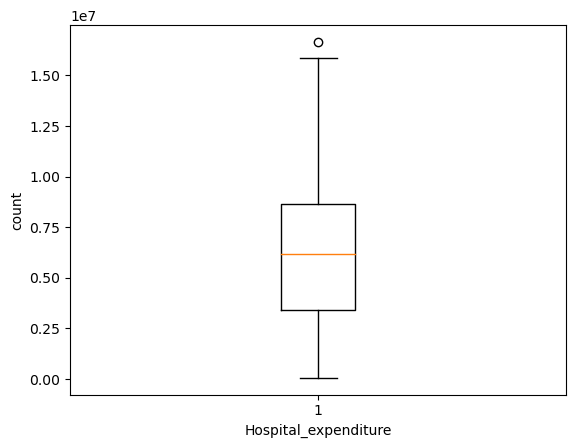

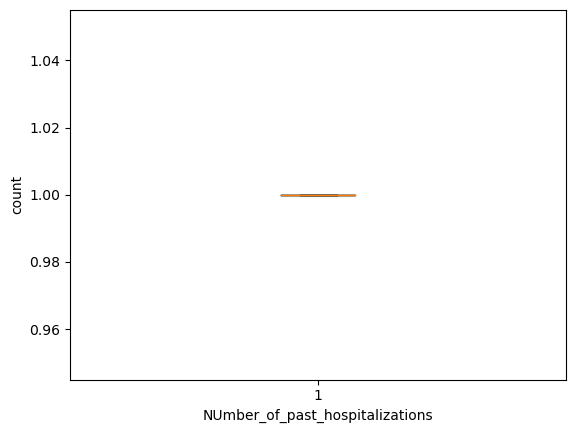

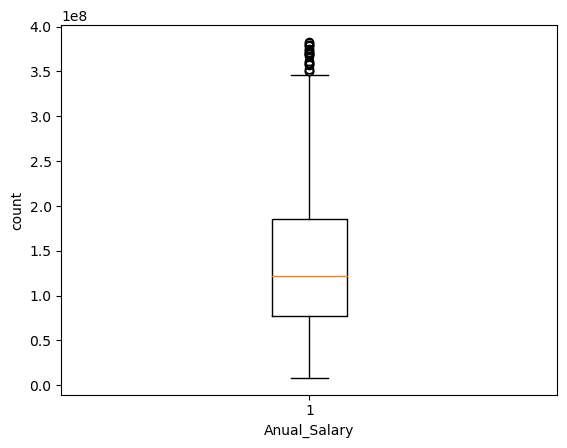

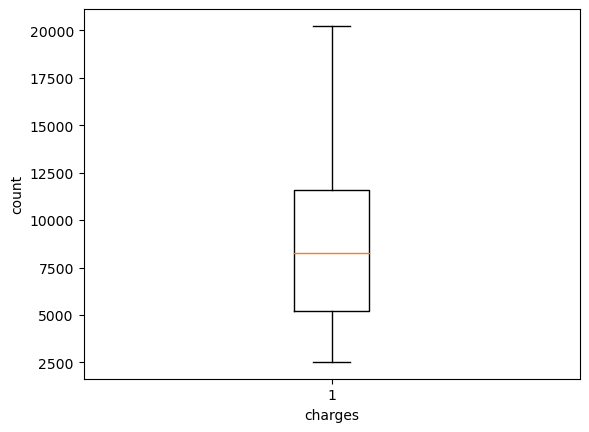

In [35]:
#outliers - 
for col in col_names:
    if insurance[col].dtype!="object":
        plt.boxplot(insurance[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [36]:
insurance.shape

(881, 13)

In [37]:
# Visualiation 

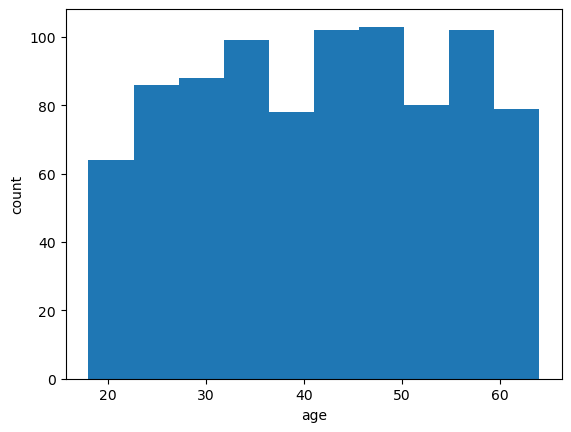

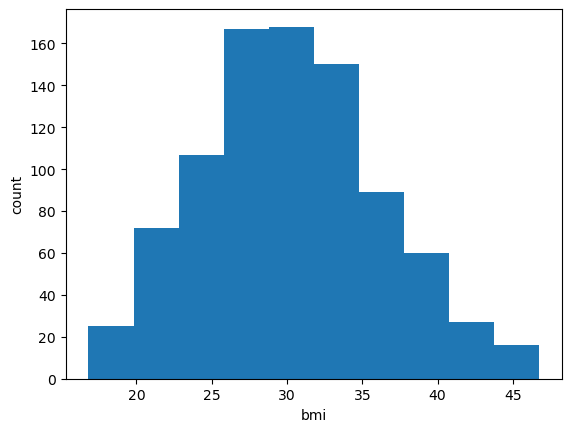

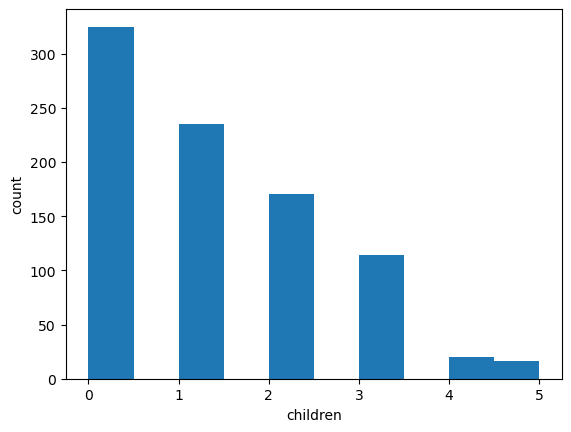

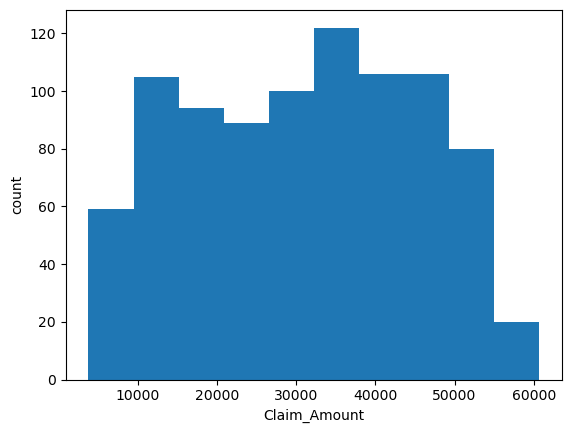

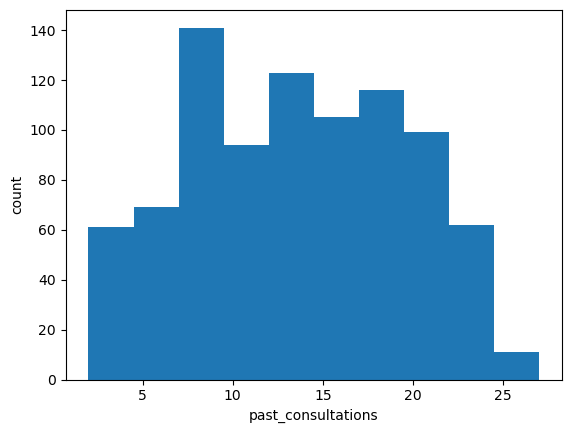

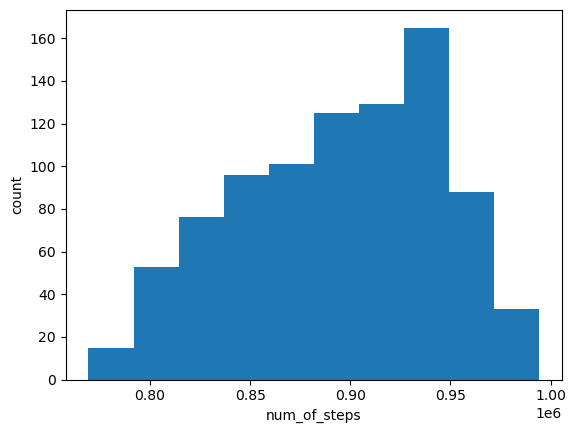

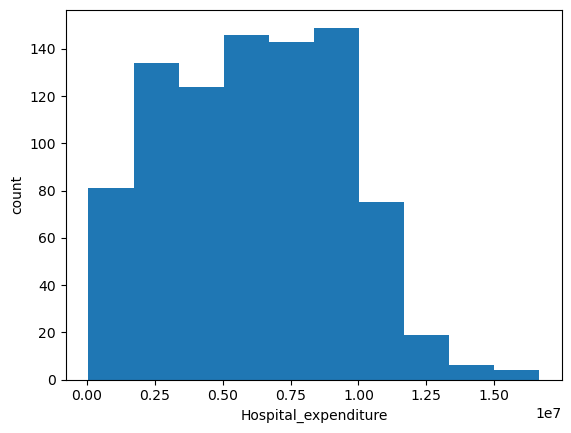

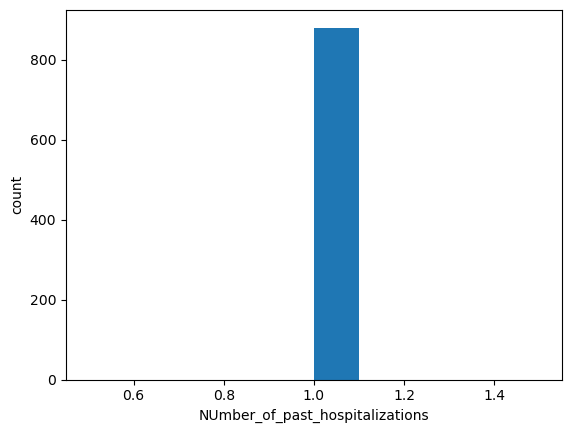

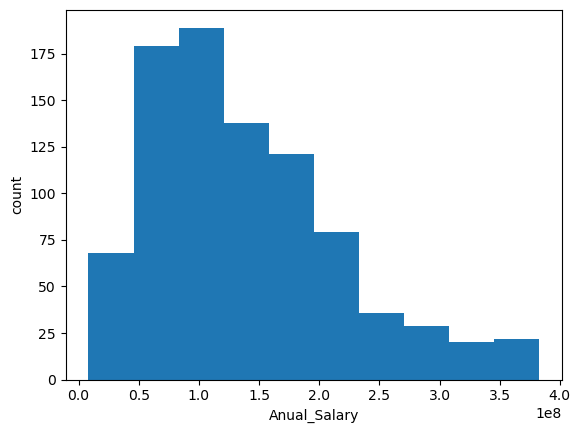

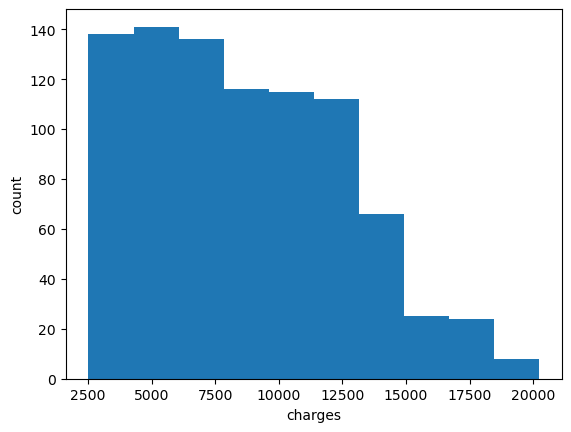

In [38]:
for col in col_names:
    if insurance[col].dtype!="object":
        plt.hist(insurance[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [39]:
# Rest of the VISUALIZATION  as Homework

In [40]:
#feature selections
correlation
VIF

NameError: name 'correlation' is not defined

In [41]:
insurance.corr().T

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.183984,-0.147639,0.067501,0.129532,0.652798,0.121272,NaN,0.403690,0.556452
bmi,0.183984,1.000000,0.004529,-0.007295,-0.014772,0.033153,0.005874,NaN,-0.010409,-0.000971
children,-0.147639,0.004529,1.000000,0.004803,-0.000280,-0.006571,-0.055478,NaN,-0.057831,-0.043309
Claim_Amount,0.067501,-0.007295,0.004803,1.000000,0.050640,0.171150,0.032715,NaN,0.138483,0.168353
past_consultations,0.129532,-0.014772,-0.000280,0.050640,1.000000,0.251344,0.098304,NaN,0.248714,0.260292
num_of_steps,0.652798,0.033153,-0.006571,0.171150,0.251344,1.000000,0.324054,NaN,0.835538,0.957156
Hospital_expenditure,0.121272,0.005874,-0.055478,0.032715,0.098304,0.324054,1.000000,NaN,0.374527,0.368732
NUmber_of_past_hospitalizations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anual_Salary,0.403690,-0.010409,-0.057831,0.138483,0.248714,0.835538,0.374527,NaN,1.000000,0.916169
charges,0.556452,-0.000971,-0.043309,0.168353,0.260292,0.957156,0.368732,NaN,0.916169,1.000000


In [42]:
import seaborn as sns

<AxesSubplot:>

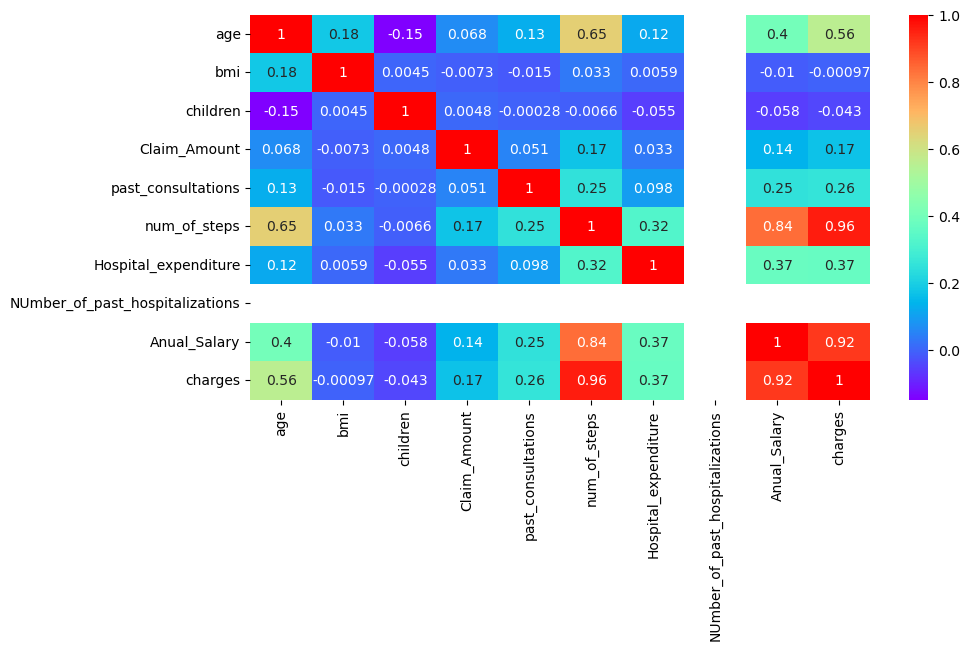

In [43]:
fig=plt.figure(figsize=(10,5))
sns.heatmap(insurance.corr(),annot=True,cmap="rainbow")

In [44]:
VIF -Variance Inflation Factor

SyntaxError: invalid syntax (207717154.py, line 1)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
    if((insurance[col].dtype!='object') & (col!='charges')):
        col_list.append(col)

In [48]:
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [49]:
X = insurance[col_list] #numerical data
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF values'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

,feature,VIF values
0,age,2.207675
1,bmi,1.052735
2,children,1.075276
3,Claim_Amount,1.035754
4,past_consultations,1.074029
5,num_of_steps,5.896868
6,Hospital_expenditure,1.173537
7,NUmber_of_past_hospitalizations,1397.629747
8,Anual_Salary,3.977132


In [50]:
X=X.drop(['NUmber_of_past_hospitalizations'], axis = 1)

In [51]:
# X = insurance[col_list] #numerical data
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF values'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

,feature,VIF values
0,age,16.168821
1,bmi,26.865674
2,children,2.067655
3,Claim_Amount,5.866290
4,past_consultations,6.463532
5,num_of_steps,58.226980
6,Hospital_expenditure,5.424130
7,Anual_Salary,6.019054


In [52]:
X=X.drop(['num_of_steps'], axis = 1)

In [53]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF values'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

,feature,VIF values
0,age,13.428790
1,bmi,14.469657
2,children,1.953715
3,Claim_Amount,5.313590
4,past_consultations,5.955358
5,Hospital_expenditure,5.141867
6,Anual_Salary,5.805037


In [54]:
X=X.drop(['bmi'], axis = 1)

In [55]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF values'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

,feature,VIF values
0,age,8.756600
1,children,1.836149
2,Claim_Amount,4.896125
3,past_consultations,5.605745
4,Hospital_expenditure,4.836388
5,Anual_Salary,5.654440


In [56]:
X=X.drop(['age'], axis = 1)

In [57]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF values'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

,feature,VIF values
0,children,1.827298
1,Claim_Amount,4.290828
2,past_consultations,4.942338
3,Hospital_expenditure,4.624025
4,Anual_Salary,4.922027


In [58]:
insurance=insurance.loc[:,["children","Claim_Amount","past_consultations","Hospital_expenditure","Anual_Salary","charges"]]

In [59]:
insurance

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,charges
151,0.0,39148.95495,10.0,8.614147e+06,5.452601e+07,2523.16950
152,0.0,41547.52536,13.0,2.491594e+05,1.671847e+07,2527.81865
153,0.0,39660.60193,12.0,3.043323e+06,4.852694e+07,2534.39375
154,2.0,16032.87148,7.0,1.599069e+06,2.441262e+07,2566.47070
155,1.0,31090.98977,21.0,3.015365e+06,5.853579e+07,2585.26900
...,...,...,...,...,...,...
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08,19107.77960
1048,3.0,46619.40230,27.0,1.361938e+07,3.812895e+08,19199.94400
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08,19350.36890
1062,2.0,21596.43846,10.0,1.083030e+07,3.696849e+08,19798.05455


In [60]:
# Split Independent and Dependent

In [61]:
x=insurance.iloc[:,:-1]
y=insurance["charges"]

In [62]:
x

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
151,0.0,39148.95495,10.0,8.614147e+06,5.452601e+07
152,0.0,41547.52536,13.0,2.491594e+05,1.671847e+07
153,0.0,39660.60193,12.0,3.043323e+06,4.852694e+07
154,2.0,16032.87148,7.0,1.599069e+06,2.441262e+07
155,1.0,31090.98977,21.0,3.015365e+06,5.853579e+07
...,...,...,...,...,...
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08
1048,3.0,46619.40230,27.0,1.361938e+07,3.812895e+08
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,1.083030e+07,3.696849e+08


In [63]:
y

151      2523.16950
152      2527.81865
153      2534.39375
154      2566.47070
155      2585.26900
           ...     
1046    19107.77960
1048    19199.94400
1050    19350.36890
1062    19798.05455
1069    20234.85475
Name: charges, Length: 881, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
#train_test
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.7, random_state=20)

In [65]:
x_train

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
763,0.0,18094.64393,20.0,1.052415e+07,1.393229e+08
851,3.0,36160.15855,9.0,1.093410e+07,2.388769e+08
776,0.0,45887.11209,13.0,1.428394e+06,1.949810e+08
788,1.0,33295.67946,15.0,8.146261e+06,1.924346e+08
239,3.0,28234.73543,8.0,6.334455e+05,5.914048e+07
...,...,...,...,...,...
369,1.0,35458.18050,11.0,7.982721e+06,3.949969e+07
374,1.0,21763.62507,4.0,2.320848e+06,7.524625e+07
422,0.0,18838.44508,17.0,2.798750e+06,7.764158e+07
626,0.0,20946.99765,10.0,8.317560e+06,1.538441e+08


In [66]:
x_test

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
498,1.0,20560.75474,16.0,9956114.866,6.447189e+07
713,1.0,44031.97502,12.0,4111040.546,1.330173e+08
940,0.0,14033.22533,8.0,5686858.707,2.106041e+08
983,3.0,51268.57895,15.0,4607528.050,3.043882e+08
207,1.0,46151.17904,19.0,6917444.679,4.440663e+07
...,...,...,...,...,...
570,2.0,17402.51145,3.0,5112771.732,1.266904e+08
228,3.0,37379.39451,18.0,9353142.095,4.575595e+07
619,0.0,54067.64103,22.0,6156271.991,1.343365e+08
373,1.0,47511.14927,15.0,6969060.848,4.423883e+07


In [67]:
y_train

763    10923.93320
851    12105.32000
776    11073.17600
788    11272.33139
239     3591.48000
          ...     
369     5148.55260
374     5245.22690
422     5966.88740
626     8671.19125
506     7077.18940
Name: charges, Length: 616, dtype: float64

In [68]:
y_test

498     6940.90985
713    10065.41300
940    13844.79720
983    15170.06900
207     3208.78700
          ...     
570     8017.06115
228     3481.86800
619     8601.32930
373     5240.76500
748    10601.41200
Name: charges, Length: 265, dtype: float64

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
l_model = LinearRegression()

In [71]:
# training your model
l_model.fit(x_train,y_train)

LinearRegression()

In [72]:
# checking predictions
predictions=l_model.predict(x_test)

In [73]:
predictions

array([ 5408.53639221,  8452.44513563, 11372.34524235, 16400.85237374,
        4820.66780211,  4466.13429343, 12393.7237657 ,  8407.38168064,
        8754.88122055, 11539.8503018 ,  7625.08843139,  5483.17407568,
        5700.77132908,  5719.2574155 ,  8366.93103724,  7877.29977474,
        8430.8964562 ,  9876.56631231,  8753.5495897 ,  5429.58264845,
        3257.90270329, 16124.43387942,  7124.1494695 ,  9386.67107752,
        7796.61710966,  5851.93153623, 11490.93710459,  7646.16364584,
        4818.95730481,  5540.63474669,  7087.4171652 ,  9956.9923601 ,
        5820.99692816, 12471.35149956,  7779.0473559 , 18847.88777665,
        6114.28359641,  6864.22464904,  5477.60485452, 10641.18441967,
        3061.51202815, 11422.67526979,  7596.76734317,  8416.67620984,
       10076.56540851,  7674.85786847,  6935.2267111 , 19857.435714  ,
        8120.03453022,  9233.3057072 ,  7473.55148246,  7040.99463117,
        5645.15581593,  6078.34322607,  7370.62095301, 19008.86649209,
      

In [74]:
y_test

498     6940.90985
713    10065.41300
940    13844.79720
983    15170.06900
207     3208.78700
          ...     
570     8017.06115
228     3481.86800
619     8601.32930
373     5240.76500
748    10601.41200
Name: charges, Length: 265, dtype: float64

In [75]:
from sklearn.metrics import *

In [76]:
r2_score(predictions,y_test)  #r2 score tells the goodness of model

0.805938260645831

In [77]:
mse=mean_squared_error(predictions,y_test)

In [78]:
rmse=np.sqrt(mse)      #rmse tells how worst your model is 

In [79]:
rmse

1625.3366294806124